<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/lessons/fastquant_lesson1_accessing_pse_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fastquant lesson 1

## Introduction to fastquant
**fastquant** is a python package that allows you easily access stock data from PSE Edge with as few as 2 lines of python code.

Its goal is to promote data driven investments by making quantitative analysis in finance accessible to everyone.


## Objectives and strategies

1) **Raise awareness, and guide beginners** to get a sufficient foundation by teaching the basics of quant analysis with lectures presented via medium articles & online lectures

2) **Make quant analysis simple and easy** w/ a high level python API that allows for lower level configuration for more advanced users - development of an easy to use python package to facilitate data driven investments

|Objective|Strategy|
|---------|--------|
Raise awareness, and guide beginners | Tutorials via Medium articles & lectures|
Make quant analysis simple and easy | Beginner friendly high level python API

## Top down approach to lectures and package design

We start w/ immediate usefulness and then work towards “deep” understanding later as more experience is gained. This approach will be reflected in the design of the blog posts, lectures, and the fastquant package.

## Expect 1 - 2 lessons per month

medium article + notebook -> webinar

Medium article + notebook takes 1-2 weeks, while webinar will take 1-2 weeks. So the pace will generally be 1-2 webinars per month. 

*Webinars will be recorded and posted as content on facebook/youtube.*

## Course Outline (Part 1) - Backtesting Classic Technical Analysis Indicators
    1. Lecture 1: Accessing PSE data in 3 lines of code
        1. Accessing PSE data in 3 lines of code
        2. Plotting a basic SMAC strategy
        3. The idea of backtesting
    2. Lecture 2: Backtest your trading strategy with 5 lines of code
    3. Lecture 3: Relative Strength Index (Intro + backtesting)
    4. Lecture 4: Bollinger Bands (Intro + backtesting)
    5. Lecture 5: Moving Average Convergence Divergence (Intro + backtesting)
    6. Lecture 6: Backtesting multiple strategies at the same time

## Course Outline (Part 2) [TBD] - Building Advanced Indicators w/ Statistics & Machine Learning based Approaches + other financial indicators

## Setup
    1. Let's make sure everyone gets Google Colab working
    2. Show github and encourage people to make an account (if they want to contribute to fastquant).
    3. Please star the repo if you find it useful! :)







# Installation

Installing `fastquant` is super simple since it's on pypi!

In [27]:
!pip install fastquant

# Get stock data from PSE in 2 lines of code!

Here I demonstrate how to get the stock data of Jollibee (JFC is the stock symbol) from January 1, 2018 to January 1, 2019.

Please ensure that your date strings are in the format YYYY-MM-DD.

You can find a list of company names and stock symbols [here](https://www.pesobility.com/stock/class-a)

In [28]:
from fastquant import get_pse_data
df = get_pse_data('JFC', '2018-01-01', '2019-01-01')
df.head()

Stock table exists!
Reading stock_table.csv ...


,open,high,low,close,value
dt,,,,,
2018-01-03,253.4,256.8,253.0,255.4,190253754.0
2018-01-04,255.4,255.4,253.0,255.0,157152856.0
2018-01-05,255.6,257.4,255.0,255.0,242201952.0
2018-01-08,257.4,259.0,253.4,256.0,216069242.0
2018-01-09,256.0,258.0,255.0,255.8,250188588.0


In [29]:
help(get_pse_data)

Help on function get_pse_data in module fastquant.fastquant:

get_pse_data(symbol, start_date, end_date, stock_table_fp='stock_table.csv', disclosures=False)
    Returns pricing data for a specified stock.
    
    Parameters
    ----------
    symbol : str
        Symbol of the stock in the PSE. You can refer to this link: https://www.pesobility.com/stock.
    start_date : str
        Starting date (YYYY-MM-DD) of the period that you want to get data on
    end_date : str
        Ending date (YYYY-MM-DD) of the period you want to get data on
    stock_table_fp : str
        File path of an existing stock table or where a newly downloaded table should be saved
    
    Returns
    -------
    pandas.DataFrame
        Stock data (in OHLCV format) for the specified company and date range



# Plot daily closing prices

For this part, we'll want to import a plotting package, matplotlib, to be able to visualize the closing prices of Jollibee. Don't worry if you don't understand how this works - for now, just take the code as is.

Text(0.5, 1.0, 'Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01')

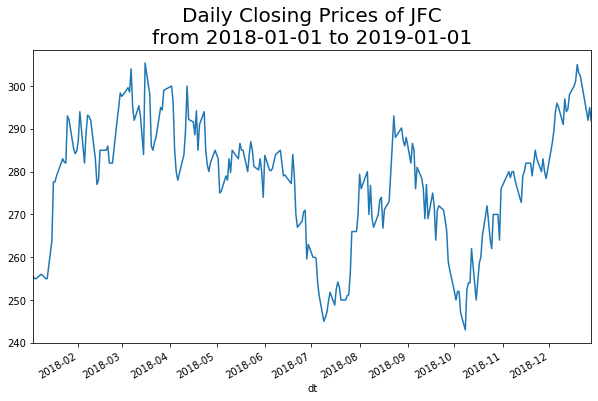

In [30]:
from matplotlib import pyplot as plt
df.close.plot(figsize=(10, 6))
plt.title("Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

# Analyze with a simple moving average crossover (SMAC) trading strategy

Now that we have the data ready, let's visualize a sample SMAC strategy.

First, let's import the pandas library (general purpose library for handling tabular data).

In [0]:
import pandas as pd

Next, we calculate the 30 day moving average of Jollibee's closing price and combine it with the original closing price data.

In [0]:
ma30 = df.close.rolling(30).mean()
close_ma30 = pd.concat([df.close, ma30], axis=1).dropna()
close_ma30.columns = ['Closing Price', 'Simple Moving Average (30 day)']

In [33]:
ma30.dropna()

dt
2018-02-13    276.586667
2018-02-14    277.340000
2018-02-15    278.340000
2018-02-19    279.340000
2018-02-20    280.340000
                 ...    
2018-12-20    287.446667
2018-12-21    288.193333
2018-12-26    288.660000
2018-12-27    289.360000
2018-12-28    289.993333
Name: close, Length: 214, dtype: float64

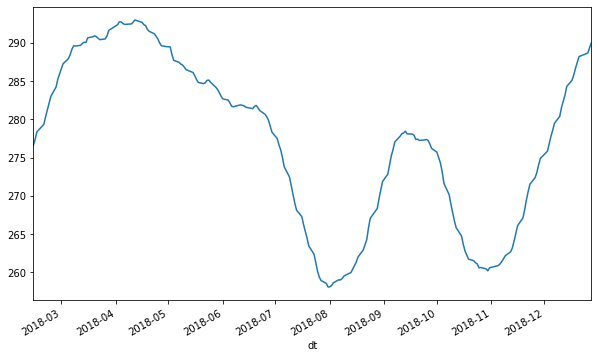

In [34]:
ma30.dropna().plot(figsize=(10, 6))

Lastly, we plot the trends for the daily crossing prices and the 30 day SMA together

Text(0.5, 1.0, 'Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01')

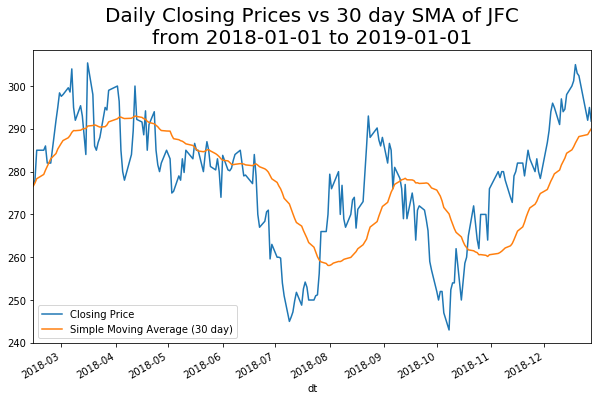

In [35]:
close_ma30.plot(figsize=(10, 6))
plt.title("Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

## Bonus: Get company disclosures

In [0]:
from fastquant import get_company_disclosures

In [0]:
jfc_disclosures = get_company_disclosures('JFC', from_date='06-26-2018', to_date='06-26-2019')

In [37]:
help(get_company_disclosures)

Help on function get_company_disclosures in module fastquant.fastquant:

get_company_disclosures(symbol, from_date='06-26-2017', to_date='06-26-2019')
    symbol str - Ticker of the pse stock of choice
    from_date date str %m-%d-%Y - Beginning date of the disclosure data pull
    to_date date str %m-%d-%Y - Ending date of the disclosure data pull



In [40]:
jfc_disclosures.iloc[0]

Company Name                                     Jollibee Foods Corporation
Template Name             [Amend-2]Notice of Annual or Special Stockhold...
PSE Form Number                                                         7-1
Announce Date and Time                                  2019-05-29 11:41:00
Circular Number                                                 C03719-2019
edge_no                                    8a9a820ee365687cefdfc15ec263a54d
url                       https://edge.pse.com.ph/openDiscViewer.do?edge...
Name: 1, dtype: object

In [42]:
jfc_disclosures.iloc[0].url

'https://edge.pse.com.ph/openDiscViewer.do?edge_no=8a9a820ee365687cefdfc15ec263a54d'

In [46]:
jfc_disclosures.iloc[15]['Template Name']

'[Amend-1]Amendments to By-Laws'

Question: how can we apply a sentiment analysis to company disclosures?

## Relevant resources
1. [Access Philippine Stock Data with Only 2 Lines of Python](https://towardsdatascience.com/access-philippine-stock-data-with-only-2-lines-of-python-309780382b8d?source=friends_link&sk=d4eab964eae7407a62690e4be1c165d7)
2. [Technical analysis basics from investopedia](https://www.investopedia.com/technical-analysis-basic-education-4689655)
3. [My Learning Plan for Getting Into Data Science from Scratch](https://towardsdatascience.com/my-learning-plan-for-getting-into-data-science-from-scratch-9562f37b4dde?source=friends_link&sk=b67ab491956a074123b4260df1667de4)

## Thank you!

Rafael - can contribute to 1) refactoring, 2) sentiment analysis on content